In [81]:
import sys
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd

import phases
import feedstock as fs
import fuel as fu
import energy as en
import gasifier as gs

In [82]:
coalUltimate = [78.4750, 3.9681, 16.0249, 0.7044, 0.7748, 0.0528] # % daf
coalAshWB = 0.128199 # fraction, w.b.
coalMoistWB = 0.02 # fraction, w.b.
coalHHV_WB = 24.727 # MJ/kg, w.b.
coalLHV_WB = 24.155 # MJ/kg, w.b.
ashMW = 80.7 # kg/kmol
ashHF = -788.92 # MJ/kmol
coalHF = -44.17 # MJ/kmol

coalHHV_DB = coalHHV_WB / (1 - coalMoistWB) # MJ/kg, d.b.
coalLHV_DB = coalLHV_WB / (1 - coalMoistWB) # MJ/kg, d.b.
coalAshDB = coalAshWB / (1 - coalMoistWB) # fraction, d.b.
coalMoistDB = coalMoistWB / (1 - coalMoistWB) # fraction, d.b.
ashComposition = [54.06, 6.57, 23.18, 6.85, 0.82, 1.6, 1.83, 0.5, 1.05, 3.54, 0] # % of ash
coal = fs.create_fuel_stream(980, coalUltimate, coalAshDB, coalMoistDB, HHV=coalHHV_DB, LHV=coalLHV_DB, ashComposition=ashComposition)

In [83]:
tempList = np.arange(100, 1000+1E-6, 25) + 273.15 # K
air = fs.create_air_stream(1000)
outletListIsot = []

outlet = gs.gasify_isot(coal, air, 373)

for i, t in enumerate(tempList):
    L = 0.934404426258142
    k = -2.88137568899622
    x0 = 2.33923615229628
    charF = L / (1 + np.exp(-k*((t-273.15)/1000 - x0)))
    outlet = gs.gasify_isot(coal, air, t, charFormation=0.925)
    outletListIsot.append(outlet)

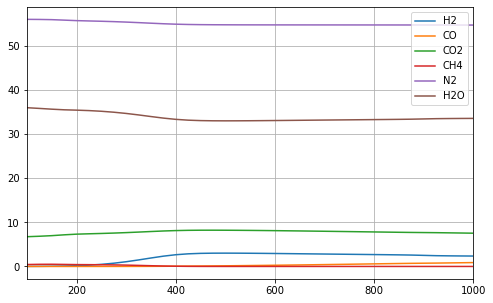

In [89]:
fig1 = plt.figure(figsize=(8,5))
species = ['H2', 'CO', 'CO2', 'CH4', 'N2', 'H2O']
for sp in species:
    plt.plot(tempList-273.15, [100*out.get_syngas_fraction(sp) for out in outletListIsot], label=sp)
plt.legend()
plt.xlim(tempList[0]-273.15, tempList[-1]-273.15)
# plt.ylim(0, 60)
plt.grid()
plt.show()

In [85]:
airMassList = np.arange(0, 10000+1E-6, 100)

stoichAir = fs.create_air_from_ER(coal, 1.0)
stoichAirMass = stoichAir.get_mass()
ERList = airMassList / stoichAirMass
print(stoichAirMass)

initialCarbon = coal.species_moles[phases.indices['C(gr)']] * phases.Mw['C(gr)']
print(initialCarbon)

8274.733605003226
668.4508347499997


In [86]:
# outletList = []
# for i, airMass in enumerate(airMassList):
#     air = fs.create_air_stream(airMass)
#     outlet = gs.gasify_nonisot(coal, air)
#     outletList.append(outlet)
    

In [87]:
pyroOutlet = outletList[0]
species = ['H2', 'CO', 'CO2', 'CH4', 'N2', 'H2O']
for sp in species:
    print(f'{sp}: {100*pyroOutlet.get_syngas_fraction(sp)}')

NameError: name 'outletList' is not defined

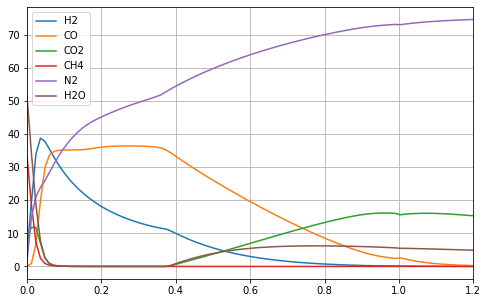

In [ ]:
fig1 = plt.figure(figsize=(8,5))
species = ['H2', 'CO', 'CO2', 'CH4', 'N2', 'H2O']
for sp in species:
    plt.plot(ERList, [100*out.get_syngas_fraction(sp) for out in outletList], label=sp)
plt.legend()
plt.xlim(0, 1.2)
plt.grid()
plt.show()

303.696678254827


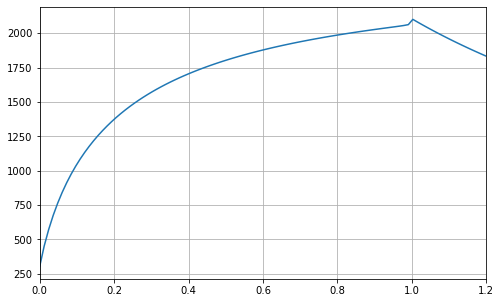

In [ ]:
fig2 = plt.figure(figsize=(8,5))
print(pyroOutlet.T - 273.15)
species = ['H2', 'CO', 'CO2', 'CH4', 'N2', 'H2O']
plt.plot(ERList, [out.T - 273.15 for out in outletList])
plt.xlim(0, 1.2)
plt.grid()
plt.show()

In [ ]:
df = pd.read_excel('char.xlsx')
charFormed = np.array(df['char'])

In [ ]:
# outletList1 = []
# for i, airMass in enumerate(airMassList):
#     air = fs.create_air_stream(airMass)
#     outlet = gs.gasify_nonisot(coal, air, charFormation=charFormed[i])
#     outletList1.append(outlet)

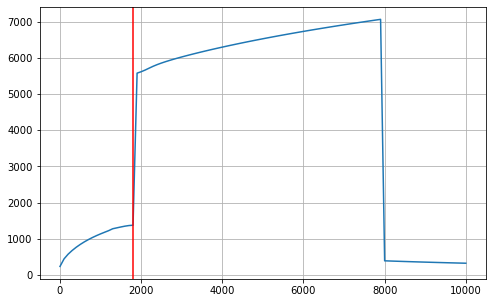

In [ ]:
fig3 = plt.figure(figsize=(8,5))
species = ['H2', 'CO', 'CO2', 'CH4', 'N2', 'H2O']
plt.plot(airMassList, [out.T - 273.15 for out in outletList1])
plt.axvline(x=1800, color='red')
plt.grid()
plt.show()

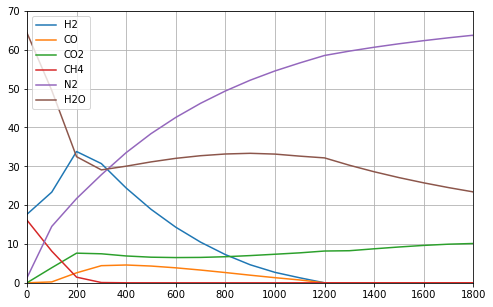

In [ ]:
fig1 = plt.figure(figsize=(8,5))
species = ['H2', 'CO', 'CO2', 'CH4', 'N2', 'H2O']
for sp in species:
    plt.plot(airMassList, [100*out.get_syngas_fraction(sp) for out in outletList1], label=sp)
plt.legend()
plt.xlim(0, 1800)
plt.ylim(0, 70)
plt.grid()
plt.show()

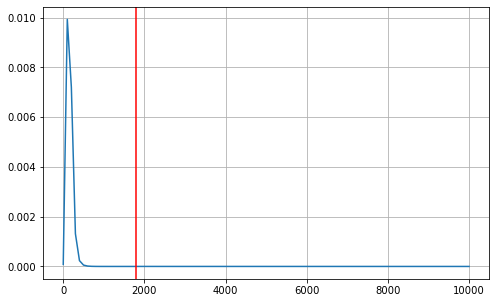

In [ ]:
charFormed2 = np.array([out.species_moles[phases.indices['C(gr)']] * phases.Mw['C(gr)'] / initialCarbon for out in outletList1])
fig4 = plt.figure(figsize=(8,5))
species = ['H2', 'CO', 'CO2', 'CH4', 'N2', 'H2O']
plt.plot(airMassList, charFormed2 - charFormed)
plt.axvline(x=1800, color='red')
plt.grid()
plt.show()

In [ ]:
pyroOutlet2 = gs.gasify_nonisot(coal, fs.create_air_from_ER(coal, 0))
pyroOutlet3 = gs.gasify_nonisot(coal, fs.create_air_from_ER(coal, 0), charFormation=0.95446500741763)
print(pyroOutlet2.species_moles[phases.indices['C(gr)']] * phases.Mw['C(gr)'] / initialCarbon, pyroOutlet3.species_moles[phases.indices['C(gr)']] * phases.Mw['C(gr)'] / initialCarbon)
print(pyroOutlet2.T, pyroOutlet3.T)
print(100*pyroOutlet2.get_syngas_fraction('H2O', water=True, nitrogen=True), 100*pyroOutlet3.get_syngas_fraction('H2O', water=True, nitrogen=True))


0.8892919289838519 0.9545482864568251
576.846678254827 509.3247883511413
51.655979607541106 64.3724777579949
